# Задача выделения сообществ и метрики оценки качества. Алгоритм Гирвана-Ньюмена. Лувенский алгоритм.

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. "Лекция 3: Выделение сообществ"
* Документация:
    * https://networkx.org/documentation/stable/reference/readwrite/generated/networkx.readwrite.edgelist.read_edgelist.html
    * https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.remove_edges_from.html
    * https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.subgraph.html
    * https://networkx.org/documentation/stable/reference/generated/networkx.classes.function.density.html
    * https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.quality.modularity.html
    * https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.quality.partition_quality.html
    * https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.components.connected_components.html
    * https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.betweenness_centrality.html
    * https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.centrality.girvan_newman.html
    * https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.quality.modularity.html
    * https://matplotlib.org/stable/users/explain/colors/colormaps.html
    * https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.louvain.louvain_communities.html
    * https://networkx.org/documentation/stable/reference/generated/networkx.linalg.graphmatrix.adjacency_matrix.html
    * https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.modularity_max.greedy_modularity_communities.html
* Дополнительные источники:
   * https://arxiv.org/pdf/0906.0612.pdf

## Вопросы для совместного обсуждения

1\. Обсудите основные метрики для оценки качества выделенных сообществ и способы их вычисления.

In [94]:
import networkx as nx

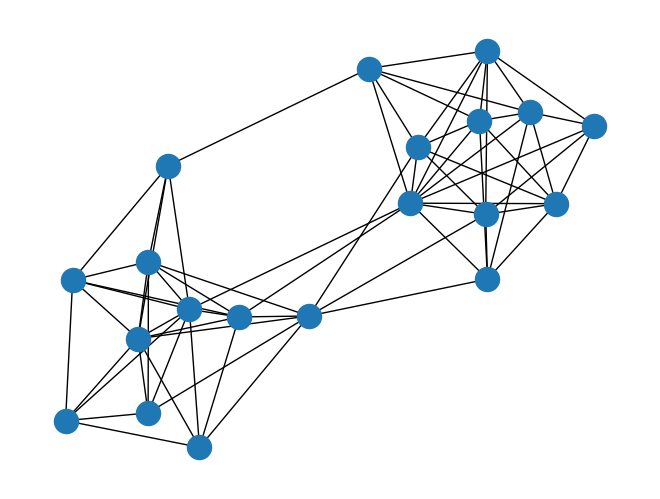

In [95]:
G = nx.random_partition_graph([10, 10], p_in=0.8, p_out=0.1)
nx.draw(G)

In [96]:
G.nodes(data=True)

NodeDataView({0: {'block': 0}, 1: {'block': 0}, 2: {'block': 0}, 3: {'block': 0}, 4: {'block': 0}, 5: {'block': 0}, 6: {'block': 0}, 7: {'block': 0}, 8: {'block': 0}, 9: {'block': 0}, 10: {'block': 1}, 11: {'block': 1}, 12: {'block': 1}, 13: {'block': 1}, 14: {'block': 1}, 15: {'block': 1}, 16: {'block': 1}, 17: {'block': 1}, 18: {'block': 1}, 19: {'block': 1}})

In [97]:
nx.density(G)

0.35789473684210527

In [98]:
nodes1 = range(0, len(G) // 2)
nodes2 = range(len(G)//2, len(G))

G1 = nx.subgraph(G, nodes1)
G2 = nx.subgraph(G, nodes2)

In [99]:
nx.density(G1), nx.density(G2)

(0.7111111111111111, 0.6666666666666666)

In [100]:
from networkx.algorithms.community.quality import modularity

In [101]:
modularity(G, communities=[set(nodes1), set(nodes2)])

0.41133217993079585

In [102]:
modularity(G, communities=[set(G)])

0.0

2\. Обсудите принцип работы алгоритма Гирвана-Ньюмена и Лувенского алгоритма и реализации этих алгоритмов в `networkx.`


In [103]:
nx.number_connected_components(G)

1

In [104]:
import networkx.algorithms.community as nx_comm

In [105]:
comm_gen = nx_comm.girvan_newman(G)

In [106]:
for cooms in comm_gen:
  pass

In [107]:
nx_comm.louvain_communities(G)

[{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}, {10, 11, 12, 13, 14, 15, 16, 17, 18, 19}]

## Задачи для самостоятельного решения

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import networkx as nx
import networkx.algorithms.community as nx_comm

<p class="task" id="1"></p>

1\. Загрузите сеть `Southern women` с сайта http://konect.cc/, удалите из него петли и создайте не менее 5 разбиений этой сети на 2 сообщества (часть разбиений должны частично или полностью соответствовать интуитивным представлениям о разбиении на сообщества, часть - нет). Для создания разбиений не используйте специализированные алгоритмы. Визуализируйте графы, раскрасив узлы в цвет соответствующего им сообщества.

- [ ] Проверено на семинаре

In [109]:
edges = pd.read_csv('data/opsahl-southernwomen/out.opsahl-southernwomen', delimiter=' ', header=None, skiprows=2).loc[:, :1].rename(columns={0: 'woman', 1: 'event'})
edges['woman'] = edges['woman'].apply(lambda x: f"w{x}")
edges['event'] = edges['event'].apply(lambda x: f"e{x}")
edges

,woman,event
0,w1,e1
1,w1,e2
2,w1,e3
3,w1,e4
4,w1,e5
...,...,...
84,w16,e8
85,w17,e8
86,w17,e14
87,w18,e8


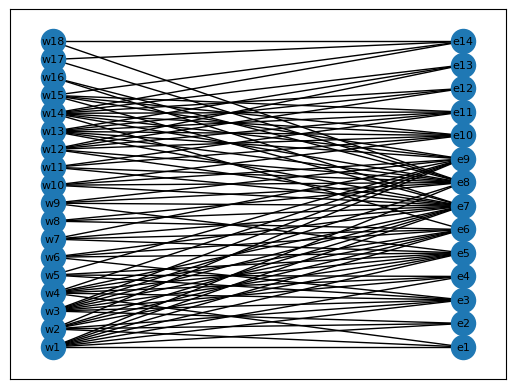

In [110]:
B = nx.Graph()

B.add_nodes_from(edges['woman'].unique(), bipartite='women')
B.add_nodes_from(edges['event'].unique(), bipartite='events')

B.add_edges_from(edges.itertuples(index=False))

pos = nx.bipartite_layout(B, nodes=[n for n in B.nodes if 'w' in n])
nx.draw_networkx(B, pos=pos, font_size=8)

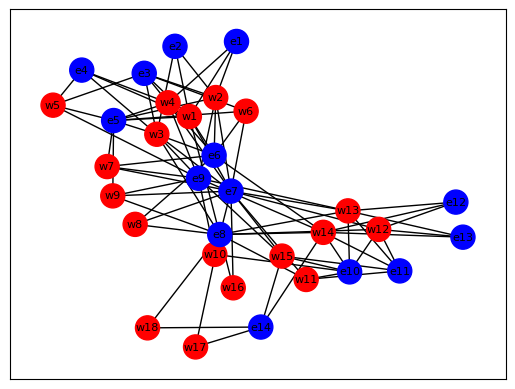

In [111]:
community_map_1 = {node: 'r' if 'w' in node else 'b' for node in B.nodes}
nx.draw_networkx(B, node_color=[community_map_1[node] for node in B.nodes], font_size=8)

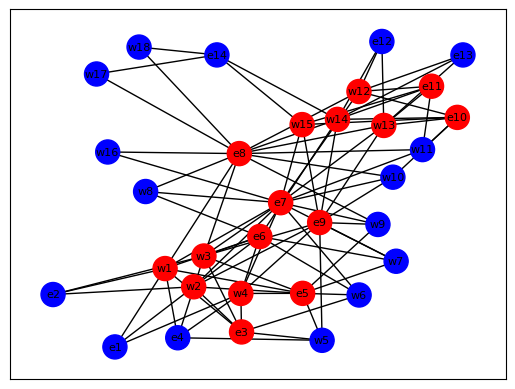

In [112]:
community_map_2 = {node: 'r' if B.degree(node) >= 5 else 'b' for node in B.nodes}
nx.draw_networkx(B, node_color=[community_map_2[node] for node in B.nodes], font_size=8)

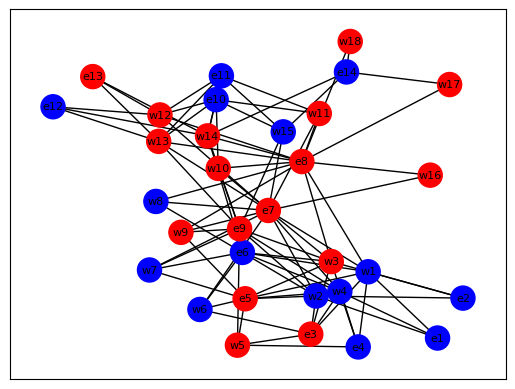

In [113]:
community_map_3 = {node: 'r' if random.random() >= 0.5 else 'b' for node in B.nodes}
nx.draw_networkx(B, node_color=[community_map_3[node] for node in B.nodes], font_size=8)

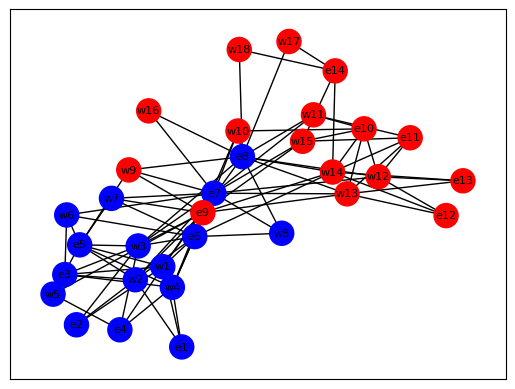

In [114]:
community_map_4 = {node: 'r' if int(node[1:]) > 8 else 'b' for node in B.nodes}
nx.draw_networkx(B, node_color=[community_map_4[node] for node in B.nodes], font_size=8)

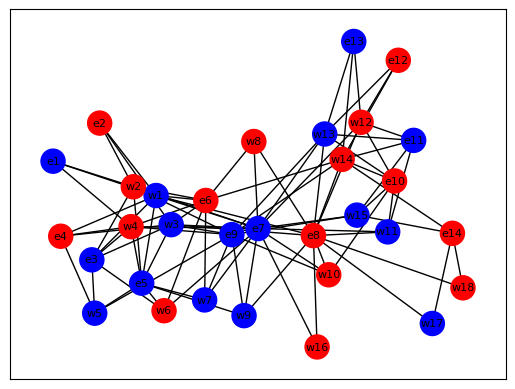

In [115]:
community_map_5 = {node: 'r' if int(node[1:]) % 2 == 0 else 'b' for node in B.nodes}
nx.draw_networkx(B, node_color=[community_map_5[node] for node in B.nodes], font_size=8)

<p class="task" id="2"></p>

2\. Для разбиений из предыдущей задачи посчитайте следующие величины:
* плотность первого сообщества
* плотность второго сообщества
* среднюю плотность сообществ.
* модулярность
* покрытие (coverage)
* эффективность (performance)

Все значения округлите до сотых и сведите в таблицу следующего вида:


| Разбиение                      | Плотность первого сообщества | Плотность второго сообщества | ... | ... |
|-------------------------------|-----------------------------|--------------|----------|----------|
| 1             |                             |              |          |          |
| ...                    |                             |              |          |          |

Для представления данных в табличном виде используйте `pandas`.

- [ ] Проверено на семинаре

In [116]:
def compute_values(B, community_map):
    B1 = nx.subgraph(B, [k for k, v in community_map.items() if v == 'r'])
    B2 = nx.subgraph(B, [k for k, v in community_map.items() if v == 'b'])
    d1, d2 = nx.density(B1), nx.density(B2)
    m = nx_comm.modularity(B, communities=[set(B1), set(B2)])
    c, p = nx_comm.partition_quality(B, partition=[set(B1), set(B2)])
    return d1, d2, (d1 + d2) / 2, m, c, p

In [117]:
community_maps = [globals()[f'community_map_{i}'] for i in range(1, 6)]

rows = []
for cm in community_maps:
    rows.append(compute_values(B, cm))

results = pd.DataFrame(rows, range(1, 6), columns=['Плотность первого сообщества', 'Плотность второго сообщества', 'Средняя плотность сообществ', 'Модулярность', 'Покрытие', 'Эффективность']).round(2)
results

,Плотность первого сообщества,Плотность второго сообщества,Средняя плотность сообществ,Модулярность,Покрытие,Эффективность
1,0.00,0.00,0.00,-0.50,0.00,0.33
2,0.32,0.02,0.18,-0.11,0.47,0.51
3,0.23,0.15,0.19,0.01,0.53,0.52
4,0.22,0.33,0.28,0.23,0.74,0.60
5,0.17,0.22,0.19,0.01,0.52,0.52


<p class="task" id="3"></p>

3\. Считайте сеть из файла `communities.edgelist`. Выполните разбиение сети на 2 сообщества с помощью алгоритма Гирвана-Ньюмена. Визуализируйте результат, раскрасив узлы в цвет, соответствующий их сообществу.

- [ ] Проверено на семинаре

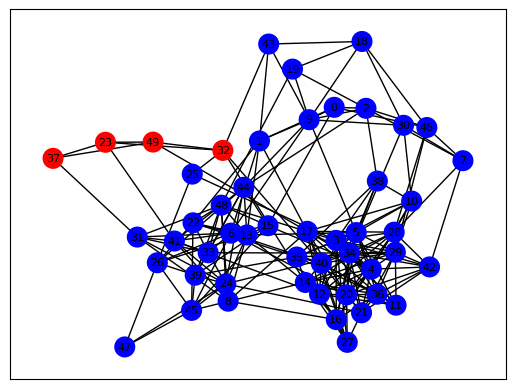

In [118]:
G = nx.read_edgelist('data/communities.edgelist')
communities = next(nx_comm.girvan_newman(G))
nx.draw_networkx(G, node_color=['r' if node in communities[0] else 'b' for node in G.nodes], font_size=8, node_size=200)

<p class="task" id="4"></p>

4\. Постройте график динамики модулярности для шагов алгоритма Гирвана-Ньюмена. Визуализируйте разбиение сети из предыдущей задачи, при котором достигается наилучшее значение модулярности (выведите это значение на экран). Для визуализации выберите несколько цветов (в соответствии с количеством выделенных сообществ) и раскрасьте узлы __и связи__ в рамках одного сообщества этими цветами. Связи между узлами, состоящими в разных сообществах, отрисуйте черным цветом.

- [ ] Проверено на семинаре

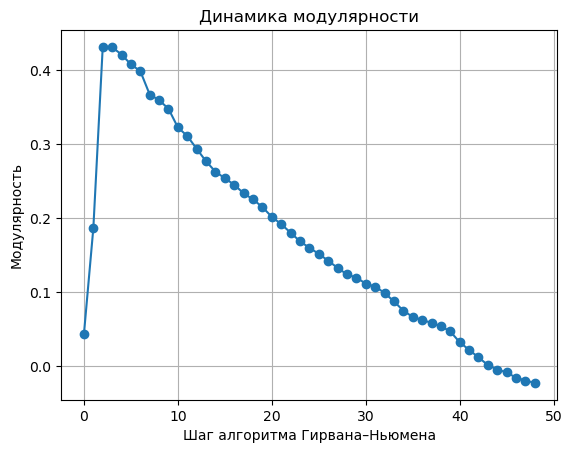

(0.4315950788751715, 4)

In [119]:
G = nx.read_edgelist('data/communities.edgelist', nodetype=int)

mods = []
comms = []
best, idx = float('-inf'), 0

for i, comm in enumerate(nx_comm.girvan_newman(G)):
    comms.append(comm)
    m = nx_comm.modularity(G, comm)
    mods.append(m)
    if m > best:
        best = m
        idx = i

plt.plot(mods, marker='o')
plt.xlabel('Шаг алгоритма Гирвана–Ньюмена')
plt.ylabel('Модулярность')
plt.title('Динамика модулярности')
plt.grid(True)
plt.show()
best, len(comms[idx])

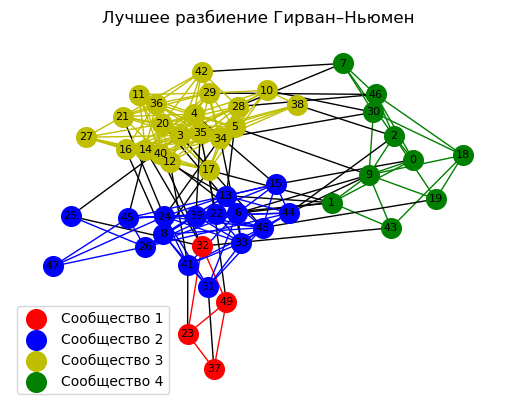

In [120]:
colors = ['r', 'b', 'y', 'g']
pos = nx.spring_layout(G)

community_map = {}
for c, community in zip(colors, comms[idx]):
    for node in community:
        community_map[node] = c

for i, community in enumerate(comms[idx]):
    nx.draw_networkx_nodes(G, pos, nodelist=community, node_color=[colors[i]], label=f'Сообщество {i+1}', node_size=200)

edge_c = []
for u, v in G.edges():
    if community_map[u] == community_map[v]:
        edge_c.append(community_map[u])
    else:
        edge_c.append('black')

nx.draw_networkx_edges(G, pos, edge_color=edge_c)
nx.draw_networkx_labels(G, pos, font_size=8)

plt.title(f'Лучшее разбиение Гирван–Ньюмен')
plt.axis('off')
plt.legend()
plt.show()

<p class="task" id="5"></p>

5\. Выполните разбиение сети из первого задания на сообщества с помощью Лувенского алгоритма. Визуализируйте результат аналогично предыдущему заданию.

- [ ] Проверено на семинаре

In [121]:
len(nx_comm.louvain_communities(B))

3

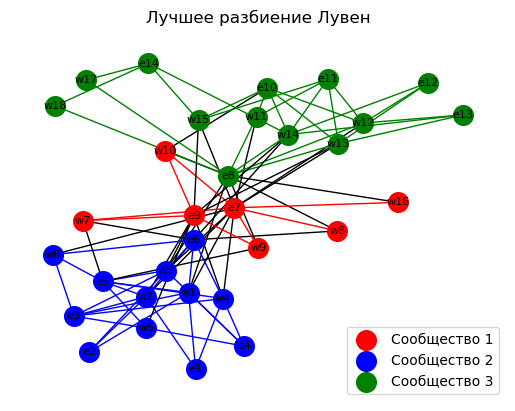

In [122]:
colors = ['r', 'b', 'g']
pos = nx.spring_layout(B)
comms = nx_comm.louvain_communities(B)

community_map = {}
for c, community in zip(colors, comms):
    for node in community:
        community_map[node] = c

for i, community in enumerate(comms):
    nx.draw_networkx_nodes(B, pos, nodelist=community, node_color=[colors[i]], label=f'Сообщество {i+1}', node_size=200)

edge_c = []
for u, v in B.edges():
    if community_map[u] == community_map[v]:
        edge_c.append(community_map[u])
    else:
        edge_c.append('black')

nx.draw_networkx_edges(B, pos, edge_color=edge_c)
nx.draw_networkx_labels(B, pos, font_size=8)

plt.title(f'Лучшее разбиение Лувен')
plt.axis('off')
plt.legend()
plt.show()

<p class="task" id="6"></p>

6\. Постройте матрицу смежности для сети. Постройте матрицу смежности для сети, в которой узлы перенумерованы в порядке возрастания номера сообщества, которому они принадлежат (т.е. номера $0...C_1-1$ даются $C_1$ узлам, принадлежащим первому сообществу; номера $C_1...C_2-1$ даются $C_2$ узлам, принадлежащим второму сообществу и т.д.). Для разбиения графа на сообщества воспользуйтесь Лувенским алгоритмом.

Визуализируйте две матрицы смежности при помощи `seaborn.heatmap`. Расположите рисунки рядом по горизонтали, добавьте названия рисунков. Сравните полученные изображения и сделайте выводы.

- [ ] Проверено на семинаре

In [123]:
len(nx_comm.louvain_communities(G))

4

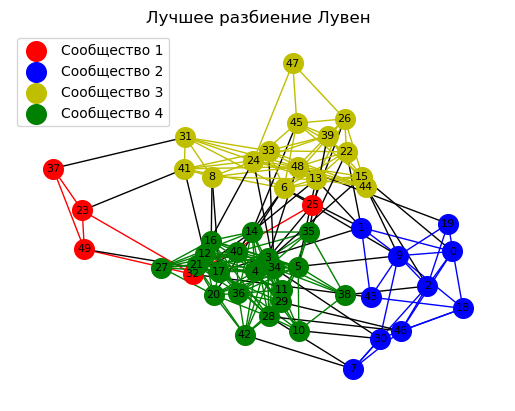

In [124]:
colors = ['r', 'b', 'y', 'g']
pos = nx.spring_layout(G)
comms = nx_comm.louvain_communities(G)

community_map = {}
for c, community in zip(colors, comms):
    for node in community:
        community_map[node] = c

for i, community in enumerate(comms):
    nx.draw_networkx_nodes(G, pos, nodelist=community, node_color=[colors[i]], label=f'Сообщество {i+1}', node_size=200)

edge_c = []
for u, v in G.edges():
    if community_map[u] == community_map[v]:
        edge_c.append(community_map[u])
    else:
        edge_c.append('black')

nx.draw_networkx_edges(G, pos, edge_color=edge_c)
nx.draw_networkx_labels(G, pos, font_size=8)

plt.title(f'Лучшее разбиение Лувен')
plt.axis('off')
plt.legend()
plt.show()

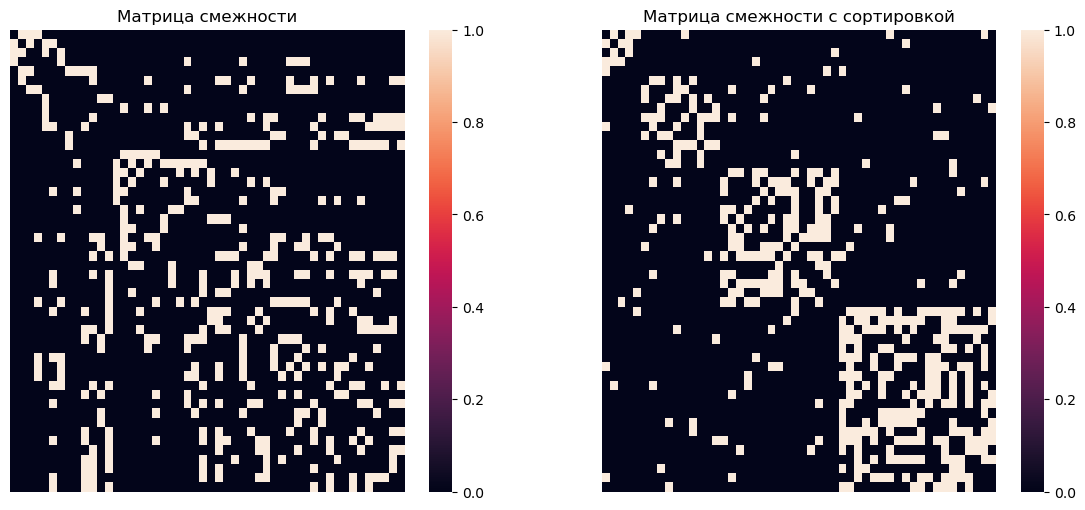

In [144]:
nodes = list(G.nodes())
A = nx.adjacency_matrix(G, nodelist=nodes).toarray()  

sorted_nodes = [node for comm in comms for node in comm]
    
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.heatmap(A, ax=axes[0])
axes[0].set_title('Матрица смежности')
axes[0].axis('off')
sns.heatmap(nx.adjacency_matrix(G, nodelist=sorted_nodes).toarray(), ax=axes[1])
axes[1].set_title('Матрица смежности с сортировкой')
axes[1].axis('off')
plt.show()